In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [40]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [41]:
nb_classes = 10

In [42]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [43]:
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [44]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [45]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [46]:
training_epochs = 15
batch_size = 100

Epoch: 0001 cost = 2.616888601
Epoch: 0002 cost = 1.059382952
Epoch: 0003 cost = 0.850800881
Epoch: 0004 cost = 0.749117834
Epoch: 0005 cost = 0.684130933
Epoch: 0006 cost = 0.637381032
Epoch: 0007 cost = 0.602413829
Epoch: 0008 cost = 0.574198499
Epoch: 0009 cost = 0.550967536
Epoch: 0010 cost = 0.531485332
Epoch: 0011 cost = 0.514698520
Epoch: 0012 cost = 0.499849447
Epoch: 0013 cost = 0.486995045
Epoch: 0014 cost = 0.475283012
Epoch: 0015 cost = 0.465133536
Accuracy: 0.8931
Label:  [9]
Prediction: [9]


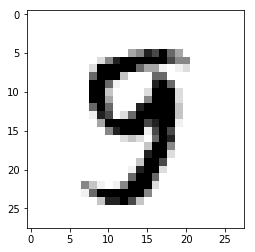

In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        print('Epoch: {:04d} cost = {:.9f}'.format((epoch + 1), avg_cost))
    print("Accuracy:", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}))

    plt.imshow(mnist.test.images[r : r + 1].reshape(28, 28), cmap="Greys", interpolation="nearest")
    plt.show()